In [1]:
import numpy as np
import scanpy as sc
import h5py
from mofapy2.run.entry_point import entry_point

# MOFA 2

## Load the datasets

In [4]:
scrna = sc.read('../data/sagner-2021/expressions_hvg.h5ad')
scrna

AnnData object with n_obs × n_vars = 6334 × 4000
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'cell_type', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'X_pca'
    layers: 'count'

In [5]:
scrna1 = scrna[scrna.obs['batch'] == '0']
scrna2 = scrna[scrna.obs['batch'] == '1']

In [6]:
scrna1

View of AnnData object with n_obs × n_vars = 2859 × 4000
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'cell_type', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'X_pca'
    layers: 'count'

In [7]:
scrna2

View of AnnData object with n_obs × n_vars = 3475 × 4000
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'cell_type', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'X_pca'
    layers: 'count'

In [9]:
scatac = sc.read('../data/sagner-2020/peaks.h5ad')
scatac

AnnData object with n_obs × n_vars = 6334 × 38313
    obs: 'nb_features', 'cell_type', 'batch'
    var: 'feature_types', 'genome', 'gene_ids-0', 'n_cells-0', 'commonness-0', 'prop_shared_cells-0', 'variability_score-0', 'gene_ids-1', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'
    layers: 'binary'

In [10]:
scatac1 = scatac[scatac.obs['batch'] == '0']
scatac2 = scatac[scatac.obs['batch'] == '1']

## Configure and train the model

In [13]:
ent = entry_point()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


In [14]:
ent.set_data_options(
    scale_groups = False, 
    scale_views = False
)

In [19]:
ent.set_data_matrix(
    [[scrna1.X.A, scrna2.X.A], [scatac1.X.A, scatac2.X.A]],
    views_names=['scRNA', 'scATAC'],
    groups_names=['batch_1', 'batch_2']
)

Features names not provided, using default naming convention:
- feature1_view1, featureD_viewM

Samples names not provided, using default naming convention:
- sample1_group1, sample2_group1, sample1_group2, ..., sampleN_groupG

Successfully loaded view='scRNA' group='batch_1' with N=2859 samples and D=4000 features...
Successfully loaded view='scRNA' group='batch_2' with N=3475 samples and D=4000 features...
Successfully loaded view='scATAC' group='batch_1' with N=2859 samples and D=38313 features...
Successfully loaded view='scATAC' group='batch_2' with N=3475 samples and D=38313 features...




In [20]:
ent.set_model_options(
    factors = 20, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)

Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (scRNA): gaussian
- View 1 (scATAC): gaussian




In [21]:
ent.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = False, 
    verbose = False, 
    seed = 1
)

In [22]:
ent.build()

In [23]:
ent.run()



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -325310555.30 

Iteration 1: time=336.76, ELBO=-23847487.08, deltaELBO=301463068.218 (92.66931654%), Factors=19
Iteration 2: time=340.91, ELBO=-19486016.25, deltaELBO=4361470.826 (1.34070990%), Factors=18
Iteration 3: time=311.41, ELBO=-18960587.81, deltaELBO=525428.448 (0.16151595%), Factors=17
Iteration 4: time=293.11, ELBO=-18515487.54, deltaELBO=445100.262 (0.13682318%), Factors=16
Iteration 5: time=276.67, ELBO=-18351370.63, deltaELBO=164116.912 (0.05044930%), Factors=15
Iteration 6: time=264.48, ELBO=-18215528.52, deltaELBO=135842.115 (0.04175767%), Factors=14
Iteration 7: time=243.08, ELBO=-18115026.76, deltaELBO=100501.758 (0.03089410%), Factors=13
Iteration 8: time=255.94, ELBO=-18070124.88, deltaELBO=44901.877 (0.01380277%), Factors=13
Iteration 9: time=245.71, ELBO=-18039577.99, deltaELBO=30546.892 (0.00939007%), Factors=13
Iteration 10

In [24]:
outfile = 'sagner-mofa2.hdf5'
ent.save(outfile)

Saving model in sagner-mofa2.hdf5...


## Save results as AnnData

In [25]:
f = h5py.File(outfile)

In [26]:
z = np.concatenate([v[:,:] for k, v in f['expectations']['Z'].items()], axis=1).T
z = sc.AnnData(z)

z.obs_names = scrna.obs_names
z.obs = scrna.obs

z

AnnData object with n_obs × n_vars = 6334 × 13
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'cell_type', 'batch'

In [27]:
z.write('../data/integrated/mofa/sagner-mofa.h5ad')

In [28]:
!rm 'sagner-mofa2.hdf5'

## Visualize results

In [29]:
sc.pp.neighbors(z)
sc.tl.umap(z)

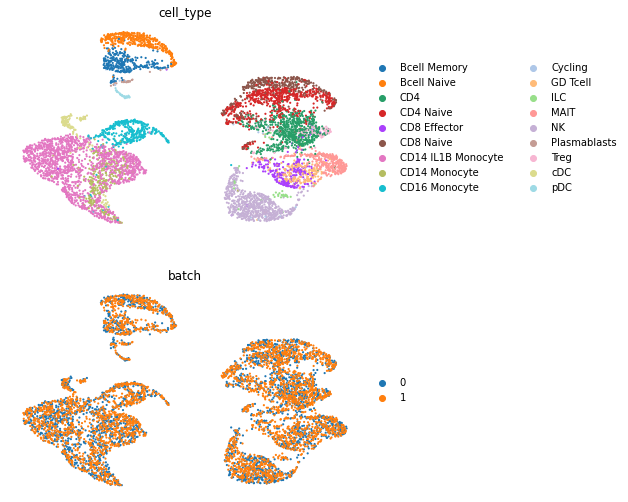

In [30]:
sc.pl.umap(z, color=['cell_type', 'batch'], ncols=1, frameon=False)